# Marketing Campain Results


## Situation:
Freedom Debt Relief’s customers are people who have a substantial amount of debt and because of an unexpected hardship, are no longer able to make their minimum monthly payments. Upon enrolling in Freedom’s Debt Relief program, customers cease making payments to their creditors and instead make deposits they can afford into a new dedicated bank account with Freedom. Freedom uses these funds to negotiate with each of the client’s creditors to settle the debt, typically at only a fraction of what was originally owed. Once a settlement has been agreed upon for an individual account, Freedom facilitates payments from the dedicated bank account to the creditor based on the terms of the settlement agreement. Freedom then collects fees from the client for the individual account that was settled. Freedom earns fees for each account it successfully negotiates a settlement agreement. The number of settlement agreements Freedom can negotiate is proportional to the monthly deposited amount. Assume industry statistics for any analysis input that you would want to use that is not provided here, including but not limited to fee percentage Freedom would collect along with ongoing cost per client between initial enrollment and program graduation.


## Assignment:
Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Assume the cost of this campaign was $5 million. There are five months of data in the datasets provided. Let’s say campaign took place over the course of the third month. You now want to show the marketing, sales and operations teams just how successful this campaign was.

**OBJECTIVE**:
1. Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

2. Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?

3. How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.

**ASSUME**:
- There is no seasonality in the results, and the campaign spend was distributed evenly across Month 3 (i.e., spend on the first day is the same as spend on the last day).

- Channel mix, targeting, and efficiency are outside the scope of this exercise.

- There may be data provided that is not useful in your end presentation



## Data Preparation

In [803]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [804]:
# Import data
calendar = pd.read_csv('calendar_data.csv')
client = pd.read_csv('client_data.csv')
deposit = pd.read_csv('deposit_data.csv')

In [805]:
# View Calender data
calendar.head()

,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


In [806]:
# Check informations of calendar data
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gregorian_date  153 non-null    object
 1   month_name      153 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [807]:
# View Client data
client.head()

,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [808]:
# Check informations of client data
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46347 entries, 0 to 46346
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   client_id                   46347 non-null  int64 
 1   client_geographical_region  46347 non-null  object
 2   client_residence_status     46347 non-null  object
 3   client_age                  46347 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


In [809]:
# View Deposit data
deposit.head()

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,10/23/2019
1,446495122764671,Actual Deposit,303.0,Monthly,9/23/2019
2,446495122764671,Scheduled Deposit,303.0,Monthly,9/23/2019
3,446495122764671,Scheduled Deposit,303.0,Monthly,10/23/2019
4,446495122764671,Scheduled Deposit,303.0,Monthly,6/23/2019


In [810]:
# Check informations of deposit data
deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480394 entries, 0 to 480393
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   client_id        480394 non-null  int64  
 1   deposit_type     480394 non-null  object 
 2   deposit_amount   480394 non-null  float64
 3   deposit_cadence  480394 non-null  object 
 4   deposit_date     480394 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.3+ MB


**1. Change data type**

In [811]:
# Change data type in gregorian_date column at Calendar data from object to datetime
calendar['gregorian_date'] = pd.to_datetime(calendar['gregorian_date'])

In [812]:
# Check data type of gregorian_date column again
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gregorian_date  153 non-null    datetime64[ns]
 1   month_name      153 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.5+ KB


In [813]:
# Change data type in deposit_date column at Deposit data from object to datetime
deposit['deposit_date'] = pd.to_datetime(deposit['deposit_date'])
deposit['deposit_date'] = deposit['deposit_date'].dt.strftime('%Y-%m-%d')
deposit['deposit_date'] = pd.to_datetime(deposit['deposit_date'])

In [814]:
# Check data type of deposit_date column again
deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480394 entries, 0 to 480393
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   client_id        480394 non-null  int64         
 1   deposit_type     480394 non-null  object        
 2   deposit_amount   480394 non-null  float64       
 3   deposit_cadence  480394 non-null  object        
 4   deposit_date     480394 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 18.3+ MB


**2. Merge the data**

In [815]:
# Deposit data perform left merge with Client data and Calendar data
df = pd.merge(deposit,client,on='client_id',how='left')
df = pd.merge(df,calendar,left_on='deposit_date', right_on='gregorian_date')

In [816]:
# Drop gregorian_date column
df = df.drop(columns=['gregorian_date'])


In [817]:
df

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,month_name
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23,West,Rent,53,Month 5
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23,West,Rent,53,Month 4
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23,West,Rent,53,Month 4
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23,West,Rent,53,Month 5
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23,West,Rent,53,Month 1
...,...,...,...,...,...,...,...,...,...
480389,190383139908095,Scheduled Deposit,188.0,Biweekly,2019-10-06,West,Rent,36,Month 5
480390,346629564742837,Scheduled Deposit,195.0,Biweekly,2019-10-06,Northeast,Own,54,Month 5
480391,346629564742837,Actual Deposit,195.0,Biweekly,2019-10-06,Northeast,Own,54,Month 5
480392,230118692632315,Scheduled Deposit,157.0,Biweekly,2019-10-06,Northeast,Own,56,Month 5


**3. Check the null values**

In [818]:
df.isna().sum()

client_id                     0
deposit_type                  0
deposit_amount                0
deposit_cadence               0
deposit_date                  0
client_geographical_region    0
client_residence_status       0
client_age                    0
month_name                    0
dtype: int64

## Data Exploration

**1. Client Geographic Analysis**

In [819]:
# Total client by region 
client_by_age = df.groupby(by='client_geographical_region')['client_id'].nunique().reset_index(name= 'total_client')
client_by_age

,client_geographical_region,total_client
0,Midwest,8151
1,Northeast,7392
2,South,10557
3,West,20247


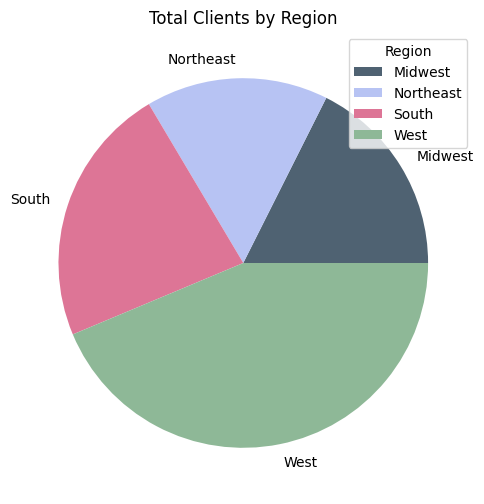

In [820]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.figure(figsize=(6,6))
pie = plt.pie(client_by_age['total_client'],labels=client_by_age['client_geographical_region'],colors=colors)
plt.title('Total Clients by Region')
plt.legend(title='Region', loc='upper right')
plt.show()

**Key Insights:**
Analysis
West is the region with the largest number of customers, occupying the largest portion of the chart.
Midwest and South have relatively similar numbers of customers.
Northeast has the fewest number of customers among the surveyed regions.
The legend in the top right corner of the chart helps identify the corresponding geographical regions for each color on the chart.

Conclusion
This chart provides a visual overview of customer distribution across geographical regions, making it easy to discern differences in customer numbers among regions. This can be valuable for market analysis and developing appropriate business strategies.

In [821]:
# The change of total client by region across all the months
client_by_age_month = pd.pivot_table(df,index='month_name',columns='client_geographical_region',values='client_id',aggfunc='nunique')

In [822]:
client_by_age_month

client_geographical_region,Midwest,Northeast,South,West
month_name,,,,
Month 1,5657,5054,7581,13848
Month 2,5807,5155,7667,14128
Month 3,7740,7001,9996,19069
Month 4,7301,6499,9260,17780
Month 5,7286,6471,9249,17712


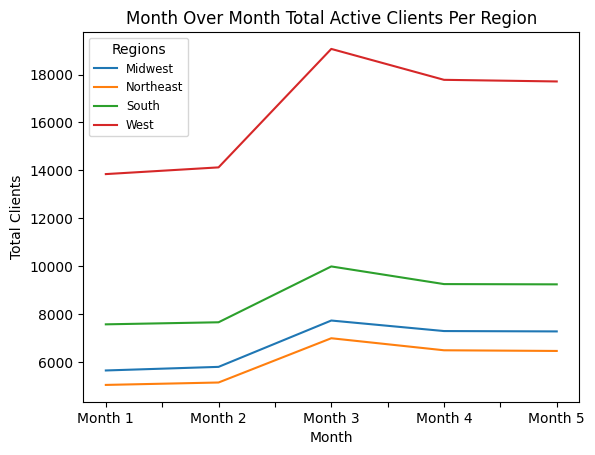

In [823]:
client_by_age_month.plot(kind='line', title='Month Over Month Total Active Clients Per Region')
plt.ylabel('Total Clients')
plt.xlabel('Month')
plt.legend(
    title='Regions',             
    fontsize='small')
plt.show()


**Key Insights:**

**West:** This region has the highest number of active clients each month. There is a significant increase from Month 2 to Month 3, after which the number of clients stabilizes around 17,700 to 19,000.

**South:** The second-highest region in terms of active clients. There is a noticeable increase from Month 2 to Month 3, peaking at approximately 10,000 clients, then slightly decreasing and stabilizing.

**Midwest:** Shows a steady increase in the number of active clients, peaking at around 7,740 in Month 3, then slightly decreasing but maintaining around 7,300 clients.

**Northeast:** This region consistently has the lowest number of active clients compared to the other regions. The client count increases until Month 3 and then slightly decreases, stabilizing around 6,500 clients.

The chart provides a clear view of how the number of active clients changes month over month across different regions. The West region consistently has the highest number of active clients, followed by the South. The Midwest and Northeast regions have fewer clients, with the Northeast having the least. This information can help in understanding regional performance and strategizing accordingly for future growth.

**2. Client Demographic Analysis**

In [824]:
# Summarize about client age
df['client_age'].describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

Text(0.5, 9.444444444444438, 'client age')

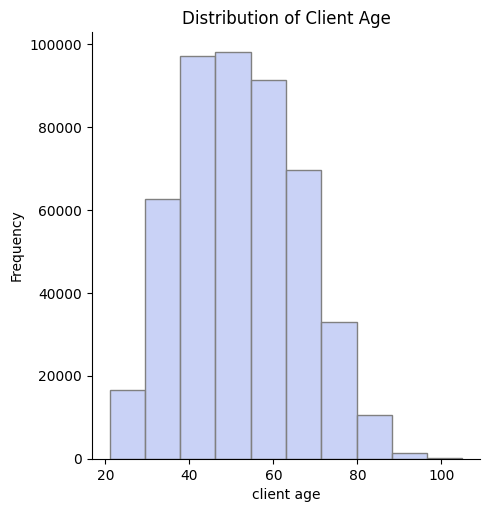

In [825]:
# Create distribution plot for client age
sns.displot(data=df,x='client_age',bins=10,color='#B7C3F3',edgecolor='grey')
plt.title('Distribution of Client Age')
plt.ylabel('Frequency')
plt.xlabel('client age')

**Key Insights:**

**Age Range**: The clients' ages range from 20 to over 100 years.

**Highest Frequency**: The age groups from 40 to 60 years have the highest frequencies, with each group having around 80,000 to 100,000 clients.

Conclusion:

This chart provides a visual overview of the age distribution of clients. Most clients are in the age range of 40 to 60 years, indicating that the majority of clients are middle-aged. This information can be useful for business strategies, marketing, and product development tailored to the target clients' age group.

In [826]:
# Total clients by client residence status
client_by_residence = df.groupby('client_residence_status')['client_id'].nunique().reset_index(name='total clients')
client_by_residence

,client_residence_status,total clients
0,Own,33945
1,Rent,12402


(0.0, 50000.0)

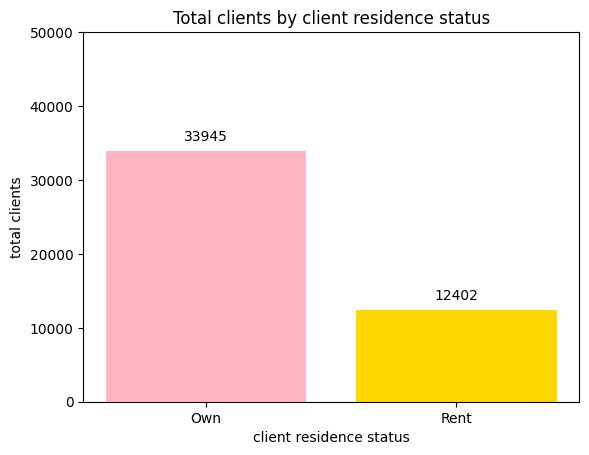

In [827]:
chart = plt.bar(client_by_residence['client_residence_status'],height=client_by_residence['total clients'],color=['lightpink','gold'])
plt.ylabel('total clients')
plt.xlabel('client residence status')
plt.title('Total clients by client residence status')
plt.bar_label(chart ,client_by_residence['total clients'],label_type='edge',padding=5)
plt.ylim(0, 50000)


**Key Insights:**

**Own:** There are 33,945 clients who own their residence, which represents the majority of the clients.

**Rent:** There are 12,402 clients who rent their residence, significantly fewer compared to those who own their residence.


In [828]:
# Total clients by client residence status across all the months
client_by_residence_month = pd.pivot_table(df,index='month_name',columns='client_residence_status',values='client_id',aggfunc='nunique')
client_by_residence_month

client_residence_status,Own,Rent
month_name,,
Month 1,23280,8860
Month 2,23635,9122
Month 3,32144,11662
Month 4,29857,10983
Month 5,29739,10979


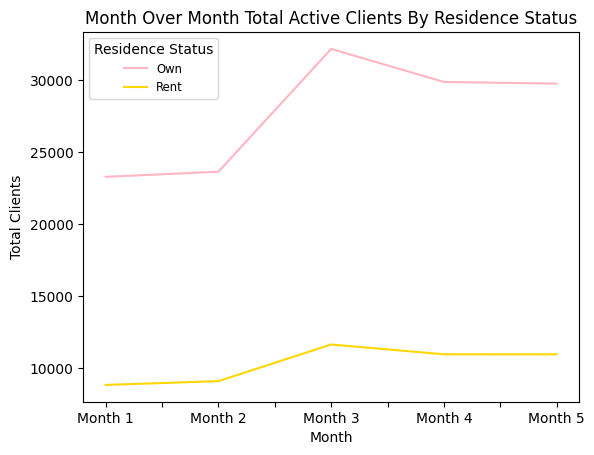

In [829]:
client_by_residence_month.plot(kind='line', title='Month Over Month Total Active Clients By Residence Status',color={'Own': 'lightpink', 'Rent': 'gold'})
plt.ylabel('Total Clients')
plt.xlabel('Month')
plt.legend(
    title='Residence Status',             
    fontsize='small')
plt.show()

**Key Insights:**

**Own:** The number of active clients who own their residence shows a significant increase in Month 3, followed by a slight decline and stabilization in subsequent months.

**Rent:** The number of active clients who rent their residence also increases in Month 3 but to a lesser extent compared to those who own their residence. The numbers then slightly decline and stabilize.

**3. Deposit Analysis**

In [830]:
df

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,month_name
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23,West,Rent,53,Month 5
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23,West,Rent,53,Month 4
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23,West,Rent,53,Month 4
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23,West,Rent,53,Month 5
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23,West,Rent,53,Month 1
...,...,...,...,...,...,...,...,...,...
480389,190383139908095,Scheduled Deposit,188.0,Biweekly,2019-10-06,West,Rent,36,Month 5
480390,346629564742837,Scheduled Deposit,195.0,Biweekly,2019-10-06,Northeast,Own,54,Month 5
480391,346629564742837,Actual Deposit,195.0,Biweekly,2019-10-06,Northeast,Own,54,Month 5
480392,230118692632315,Scheduled Deposit,157.0,Biweekly,2019-10-06,Northeast,Own,56,Month 5


In [831]:
# Check all deposit types
df['deposit_type'].value_counts()

deposit_type
Scheduled Deposit    247986
Actual Deposit       232408
Name: count, dtype: int64

In [832]:
# Find the meaning of deposit types
# Check activities of 1 particular client
df[df['client_id']==446495122764671].sort_values(by='deposit_date')

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,month_name
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23,West,Rent,53,Month 1
6,446495122764671,Actual Deposit,303.0,Monthly,2019-06-23,West,Rent,53,Month 1
5,446495122764671,Scheduled Deposit,303.0,Monthly,2019-07-23,West,Rent,53,Month 2
7,446495122764671,Actual Deposit,303.0,Monthly,2019-07-23,West,Rent,53,Month 2
8,446495122764671,Scheduled Deposit,303.0,Monthly,2019-08-23,West,Rent,53,Month 3
9,446495122764671,Actual Deposit,303.0,Monthly,2019-08-23,West,Rent,53,Month 3
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23,West,Rent,53,Month 4
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23,West,Rent,53,Month 4
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23,West,Rent,53,Month 5
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23,West,Rent,53,Month 5


- It is clear that a ***scheduled deposit*** is a sum of money that is anticipated to be deposited into an account at a particular future date, as determined by a pre-existing plan. On the other hand, an ***actual deposit*** is the precise amount of money deposited into an account at a given moment.

- So, the profit that Freedom Debt can be received only based on actual deposit. Scheduled deposit doesn't affect sales or profit of this company.


In [833]:
# Find the meaning of deposit cadence
df['deposit_cadence'].value_counts()

deposit_cadence
Monthly     262858
Biweekly    209189
Extra         8347
Name: count, dtype: int64

In [834]:
# Check activities of 1 particular client who has Biweekly deposit cadence
df1 = df[df['deposit_cadence']=='Biweekly'].sort_values(by='deposit_date')
df1

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,month_name
329742,194532805035873,Scheduled Deposit,320.0,Biweekly,2019-06-01,West,Own,60,Month 1
331763,417653029123881,Actual Deposit,117.0,Biweekly,2019-06-01,Northeast,Own,47,Month 1
331762,417653029123881,Scheduled Deposit,117.0,Biweekly,2019-06-01,Northeast,Own,47,Month 1
331751,91006299084622,Actual Deposit,136.0,Biweekly,2019-06-01,Northeast,Own,58,Month 1
331750,91006299084622,Scheduled Deposit,136.0,Biweekly,2019-06-01,Northeast,Own,58,Month 1
...,...,...,...,...,...,...,...,...,...
85345,351991910288473,Actual Deposit,297.0,Biweekly,2019-10-31,West,Own,36,Month 5
85343,351991910288473,Scheduled Deposit,297.0,Biweekly,2019-10-31,West,Own,36,Month 5
85107,230905215304358,Scheduled Deposit,203.0,Biweekly,2019-10-31,South,Own,64,Month 5
86832,615282321972994,Scheduled Deposit,242.0,Biweekly,2019-10-31,South,Rent,32,Month 5


In [835]:
df1[df1['client_id']==417653029123881].sort_values(by='deposit_date')

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,month_name
331763,417653029123881,Actual Deposit,117.0,Biweekly,2019-06-01,Northeast,Own,47,Month 1
331762,417653029123881,Scheduled Deposit,117.0,Biweekly,2019-06-01,Northeast,Own,47,Month 1
354402,417653029123881,Actual Deposit,117.0,Biweekly,2019-06-15,Northeast,Own,47,Month 1
354401,417653029123881,Scheduled Deposit,117.0,Biweekly,2019-06-15,Northeast,Own,47,Month 1
121926,417653029123881,Scheduled Deposit,117.0,Biweekly,2019-06-29,Northeast,Own,47,Month 1
121929,417653029123881,Actual Deposit,117.0,Biweekly,2019-06-29,Northeast,Own,47,Month 1
121928,417653029123881,Actual Deposit,122.0,Biweekly,2019-07-13,Northeast,Own,47,Month 2
121927,417653029123881,Scheduled Deposit,122.0,Biweekly,2019-07-13,Northeast,Own,47,Month 2
121930,417653029123881,Actual Deposit,122.0,Biweekly,2019-07-27,Northeast,Own,47,Month 2
121925,417653029123881,Scheduled Deposit,122.0,Biweekly,2019-07-27,Northeast,Own,47,Month 2


In [836]:
# Check activities of 1 particular client who has Extra deposit cadence
df2 = df[df['deposit_cadence']=='Extra'].sort_values(by='deposit_date')
df2

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,month_name
330377,852569540179390,Actual Deposit,300.0,Extra,2019-06-01,Midwest,Own,47,Month 1
331103,459428082806451,Actual Deposit,185.0,Extra,2019-06-01,West,Rent,62,Month 1
331086,824868549615115,Actual Deposit,20.0,Extra,2019-06-01,West,Own,47,Month 1
331053,697286758825349,Actual Deposit,474.0,Extra,2019-06-01,West,Own,34,Month 1
330945,769282751387891,Actual Deposit,106.0,Extra,2019-06-01,West,Own,45,Month 1
...,...,...,...,...,...,...,...,...,...
37811,872346686466610,Actual Deposit,484.0,Extra,2019-10-31,West,Own,73,Month 5
42819,848538313814993,Actual Deposit,222.0,Extra,2019-10-31,South,Own,41,Month 5
49954,145762680373141,Actual Deposit,70.0,Extra,2019-10-31,West,Own,36,Month 5
111925,428270284848052,Actual Deposit,162.0,Extra,2019-10-31,Northeast,Rent,46,Month 5


In [837]:
df2[df2['client_id']==824868549615115].sort_values(by='deposit_date')

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,month_name
331086,824868549615115,Actual Deposit,20.0,Extra,2019-06-01,West,Own,47,Month 1
376283,824868549615115,Actual Deposit,28.0,Extra,2019-07-01,West,Own,47,Month 2


In [838]:
df[df['client_id']==824868549615115].sort_values(by='deposit_date')

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,month_name
331084,824868549615115,Scheduled Deposit,452.0,Monthly,2019-06-01,West,Own,47,Month 1
331085,824868549615115,Actual Deposit,452.0,Monthly,2019-06-01,West,Own,47,Month 1
331086,824868549615115,Actual Deposit,20.0,Extra,2019-06-01,West,Own,47,Month 1
376282,824868549615115,Scheduled Deposit,452.0,Monthly,2019-07-01,West,Own,47,Month 2
376283,824868549615115,Actual Deposit,28.0,Extra,2019-07-01,West,Own,47,Month 2
376284,824868549615115,Actual Deposit,452.0,Monthly,2019-07-01,West,Own,47,Month 2
184773,824868549615115,Scheduled Deposit,452.0,Monthly,2019-08-01,West,Own,47,Month 3
215187,824868549615115,Actual Deposit,452.0,Monthly,2019-08-13,West,Own,47,Month 3
215188,824868549615115,Scheduled Deposit,452.0,Monthly,2019-08-13,West,Own,47,Month 3
267158,824868549615115,Scheduled Deposit,152.0,Monthly,2019-09-01,West,Own,47,Month 4


We have 3 types of deposit cadence:
- **Monthly**: Client deposit money into account 1 time per month
- **Biweekly**: Client deposit money into account 2 weeks per time
- **Extra**: The extra money that client deposit into account without schedule

In [839]:
# Total client by deposit cadence
client_by_cadence= df.groupby('deposit_cadence')['client_id'].nunique().reset_index(name='total client')
client_by_cadence

,deposit_cadence,total client
0,Biweekly,13183
1,Extra,5098
2,Monthly,32594


In [840]:
# Total unique client by deposit cadence across all the months
client_by_cadence_month = pd.pivot_table(df,index='month_name',columns='deposit_cadence',values='client_id',aggfunc='nunique')

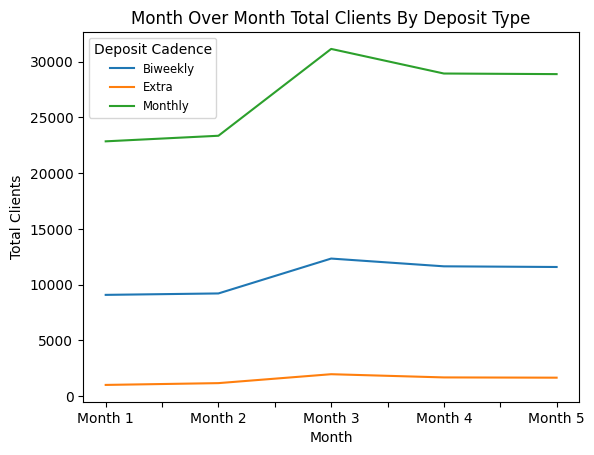

In [841]:
client_by_cadence_month.plot(kind='line', title='Month Over Month Total Clients By Deposit Type')
plt.ylabel('Total Clients')
plt.xlabel('Month')
plt.legend(
    title='Deposit Cadence',             
    fontsize='small')
plt.show()

**Monthly Deposits:** The number of active clients making monthly deposits shows a significant increase in Month 3, followed by a slight decline and stabilization in subsequent months.

**Biweekly Deposits:** The number of active clients making biweekly deposits shows a steady increase up to Month 3, and then stabilizes.

**Extra Deposits:** The number of active clients making extra deposits remains relatively constant with a slight increase in Month 2 and then stabilizes.

**Conclusion:**

The chart highlights that there was a peak in client activity in Month 3 for both monthly and biweekly deposit types, with monthly deposits showing a more significant increase. The number of clients making extra deposits remains relatively stable over the months. This information can be useful for understanding client engagement patterns based on their deposit cadence and planning targeted strategies for different client segments.

In [842]:
# The change of total unique client by region by deposit cadence across all the months
client_by_region_cadence_month = df.groupby(['client_geographical_region', 'deposit_cadence', 'month_name'])['client_id'].nunique().unstack().pct_change(axis='columns')*100

In [843]:
client_by_region_cadence_month

month_name                                  Month 1    Month 2    Month 3  \
client_geographical_region deposit_cadence                                  
Midwest                    Biweekly             NaN   2.245929  34.047227   
                           Extra                NaN  29.775281  53.246753   
                           Monthly              NaN   2.546778  32.665991   
Northeast                  Biweekly             NaN   1.001252  37.608426   
                           Extra                NaN  24.113475  78.857143   
                           Monthly              NaN   2.514620  34.626355   
South                      Biweekly             NaN   0.858586  29.143716   
                           Extra                NaN  21.097046  57.491289   
                           Monthly              NaN   1.080108  30.489760   
West                       Biweekly             NaN   1.480883  35.022552   
                           Extra                NaN   5.479452  80.952381   
                           Monthly              NaN   2.563847  34.772882   

month_name                                    Month 4   Month 5  
client_geographical_region deposit_cadence                       
Midwest                    Biweekly         -4.997952 -0.301854  
                           Extra           -19.491525 -1.052632  
                           Monthly          -5.730659 -0.101317  
Northeast                  Biweekly         -6.528591 -1.059730  
                           Extra           -17.571885  1.937984  
                           Monthly          -7.055085 -0.205152  
South                      Biweekly         -5.854983 -0.041186  
                           Extra            -9.292035 -8.292683  
                           Monthly          -7.656613  0.088679  
West                       Biweekly         -5.462763 -0.623571  
                           Extra           -14.593301  1.260504  
                           Monthly          -7.310912 -0.350385

Text(0.5, 0, 'total client')

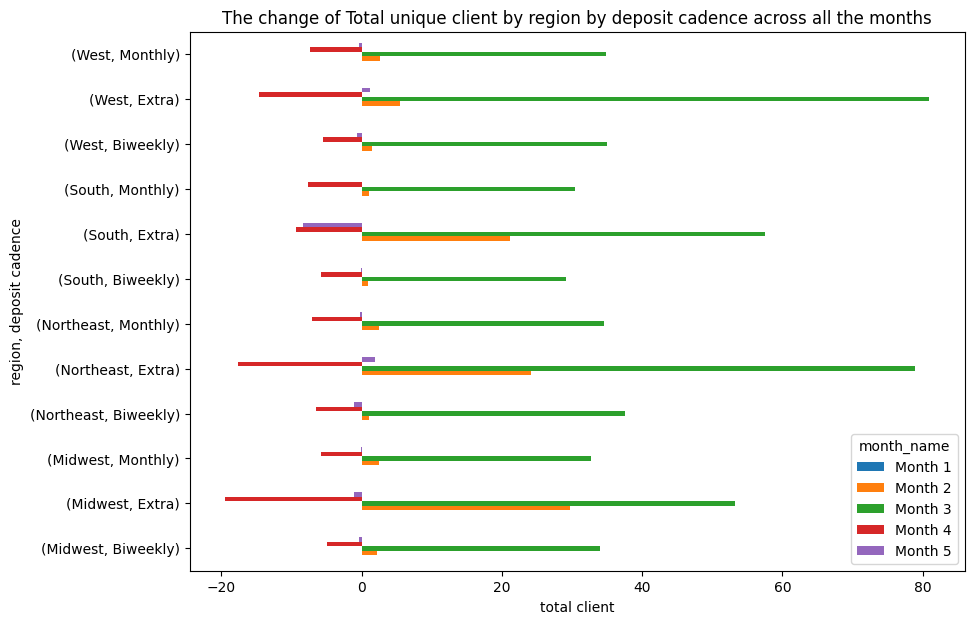

In [844]:
client_by_region_cadence_month.plot(kind='barh',title='The change of Total unique client by region by deposit cadence across all the months',figsize=(10, 7))
plt.ylabel('region, deposit cadence')
plt.xlabel('total client')


**West Region**:

- Monthly deposit clients showed significant increases in Month 3, with a decrease in subsequent months.

- Extra deposits had the most dramatic increase in Month 3, with a slight decline afterward.

- Biweekly deposits followed a similar pattern with notable growth in Month 3.

**South Region**:

- Monthly deposit clients saw an increase in Month 3, followed by a decrease.

- Extra deposits showed significant growth in Month 3 but had a decline in Month 4 and 5.

- Biweekly deposits also increased in Month 3, then decreased in Month 4.

**Northeast Region**:

- Monthly and biweekly deposits saw a significant increase in Month 3 and a decrease in Month 4.

- Extra deposits had a significant increase in Month 3, with a decline in Month 4 and slight increase in Month 5.

**Midwest Region**:

- Monthly deposit clients had an increase in Month 3 and a decline in subsequent months.

- Extra deposits showed significant growth in Month 3, with declines in Month 4 and 5.

- Biweekly deposits followed a similar pattern with notable growth in Month 3.

**Conclusion**

The chart highlights significant changes in client activity by region and deposit cadence, with noticeable peaks in Month 3 across most regions and deposit types. This information can help in understanding regional and cadence-based client behavior trends, aiding in targeted marketing and client engagement strategies.

In [845]:
df3 = df[df['deposit_type']=='Actual Deposit']

In [846]:
# Total amount of deposit per month
total_deposit = df3.groupby('month_name')['deposit_amount'].sum().reset_index(name='Total deposit amount')
total_deposit

,month_name,Total deposit amount
0,Month 1,14290184.25
1,Month 2,14653623.58
2,Month 3,19524393.05
3,Month 4,18951569.18
4,Month 5,18657678.80


Text(0, 0.5, 'Deopsit Amount')

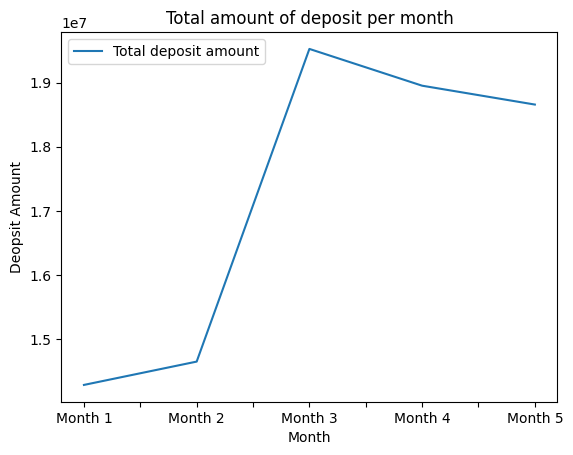

In [847]:
total_deposit.plot(kind='line',x='month_name', y='Total deposit amount',title='Total amount of deposit per month')
plt.xlabel('Month')
plt.ylabel('Deopsit Amount')



- Month 1: The total deposit amount is 14,290,184.25.
- Month 2: There is a slight increase to 14,653,623.58.
- Month 3: The total deposit amount spikes significantly to 19,524,393.05, marking the highest value observed.
- Month 4: The deposit amount decreases slightly to 18,951,569.18.
- Month 5: The total deposit amount continues to decrease marginally to 18,657,678.80.

**Conclusion**

The chart clearly shows a substantial increase in deposits in Month 3, followed by a slight decline in the subsequent months. The initial increase in deposits could be attributed to specific events or seasonal trends that should be further investigated. Overall, the total deposit amounts remain relatively high, indicating positive growth. This insight is valuable for understanding deposit trends and can inform strategic decisions for financial planning and resource allocation

In [848]:
df3['deposit_amount'].describe()

count    232408.000000
mean        370.372142
std         411.702218
min           0.010000
25%         200.000000
50%         290.000000
75%         452.000000
max       30000.000000
Name: deposit_amount, dtype: float64

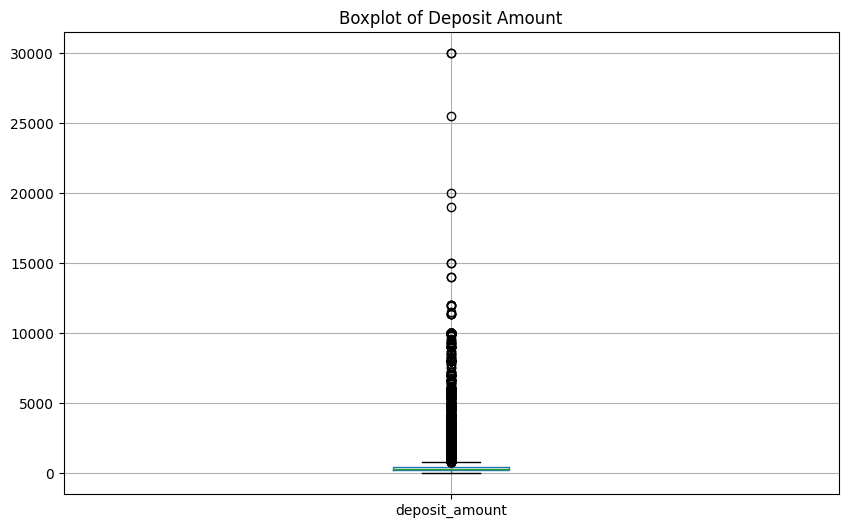

In [849]:
plt.figure(figsize=(10,6))
bp = df3.boxplot(column='deposit_amount')
plt.title('Boxplot of Deposit Amount')
plt.show()

In [850]:
df4 = df3[df3['deposit_amount']<2500]

Text(0.5, 9.444444444444438, 'client age')

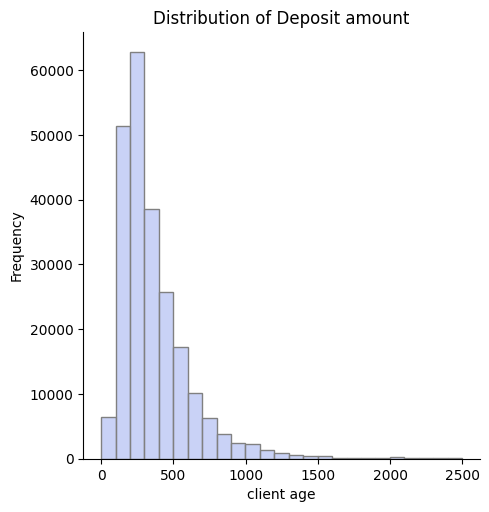

In [851]:
sns.displot(data=df4,x='deposit_amount',bins=25,color='#B7C3F3',edgecolor='grey')
plt.title('Distribution of Deposit amount')
plt.ylabel('Frequency')
plt.xlabel('client age')


## Data Analyzing

**1. Provide a quantitative assessment of whether the marketing campaign was successful**

In order evaluate whether the marketing campain was successfull, we need to determine specific success metrics. Typical marketing campaign success metrics could be:

*1.1. Return on Ad Spend (ROAS)*

### ROAS = Revenue generated from campain /Campain Cost x 100

In [852]:
# Calculate Revenue generated from campain (revenue of month 3)
revenue_m3 = total_deposit[total_deposit['month_name']=='Month 3']['Total deposit amount']
revenue_m3

2    19524393.05
Name: Total deposit amount, dtype: float64

In [853]:
# Calculate ROAS
campaign_cost = 5000000
roas = revenue_m3/campain_cost
roas

2    3.904879
Name: Total deposit amount, dtype: float64

- The ROAS of this campain is 3.9 reflected that every dollar the company invested in ad spend for this one-month campaign generated $3.9 in revenue. It could be a highly profitable campaign.

*1.2. Customer Acquisition Cost (CAC)*

### CAC = Campaign Cost/Number of new clients acquired

In [854]:
# Get a list of unique clients each month.
clients_m1 = set(df[df['month_name']=='Month 1']['client_id'].unique())
clients_m2 = set(df[df['month_name']=='Month 2']['client_id'].unique())
clients_m3 = set(df[df['month_name']=='Month 3']['client_id'].unique())

# Calculate the number of new clients acquired
new_clients_m3 = clients_m3 - (clients_m1|clients_m2)
number_new_clients_m3 = len(new_clients_m3)
number_new_clients_m3

11544

In [855]:
# Calculate CAC
cac = campaign_cost/number_new_clients_m3
cac

433.1254331254331

- The CAC is $443. It means you have to spend an average of $433 to attract a new client. Observationally, this cost is quite high for new one client. However, we haven't judged the success of marketing by CAC yet because we need more information about Lifetime Value.

*1.3. The metrics by time*

Besides the metrics that belong to the marketing field, we can also evalute the efficiency of this campain by observing the change of some elements across all the months. Such as:
- Number of Unique Clients Per Month
- Total Amount of Deposits Per Month

We restate the metrics mentioned above, which we discussed in detail in the data exploration section, once more.

In [856]:
# The change of Number of Unique Clients month over month
df.groupby('month_name')['client_id'].nunique().pct_change() * 100

month_name
Month 1          NaN
Month 2     1.919726
Month 3    33.730195
Month 4    -6.770762
Month 5    -0.298727
Name: client_id, dtype: float64

- As we can see, the number of unique clients in month 3 increased dramatically compare to month 2 (**33.73%**). Meanwhile, the increase of month 2 compare to month 1 is not significant (**1.91%**). The number of unique clients remained high after the campaign ended (months 4 and 5) although it has lightly descrease compare to month 3.
- Since the marketing campaign was launched in the third month, we can explain why there was a peak in that month. It proves that the campain sucessfully affected the number of unique clients.

In [857]:
# The change of Total Amount of Deposits month over month
df3.groupby('month_name')['deposit_amount'].sum().pct_change() * 100

month_name
Month 1          NaN
Month 2     2.543280
Month 3    33.239352
Month 4    -2.933888
Month 5    -1.550744
Name: deposit_amount, dtype: float64

- As the change of number clients, the total amount of deposits in month 3 increased dramatically compare to month 2 (**33.23%**). Meanwhile, the increase of month 2 compare to month 1 is not significant (**2.54%**). The total amount of deposit remained high after the campaign ended (months 4 and 5) although it has lightly descrease compare to month 3.

In [858]:
# Calculate the change after the marketing campain happened
# The change in total amount of deposits from month 3 to month 2
m3_increase = total_deposit['Total deposit amount'][2] - total_deposit['Total deposit amount'][1]

# The change in total amount of deposits from month 4 to month 2
m4_increase = total_deposit['Total deposit amount'][3] - total_deposit['Total deposit amount'][1]

# The change in total amount of deposits from month 5 to month 2
m5_increase = total_deposit['Total deposit amount'][4] - total_deposit['Total deposit amount'][1]

In [859]:
# Total deposits increased over 3 month since the marketing campain happend
total_increase = m3_increase + m4_increase + m5_increase
total_increase_after_cost = total_increase - campain_cost
print(total_increase)
print(total_increase_after_cost)

13172770.290000001
8172770.290000001


In [860]:
# Average of total deposit increased per month
avg_increase = total_increase/3
avg_increase

4390923.430000001

- The marketing campaign increased monthly total deposits by approximately **$4.4** million.
- The entire deposit for month 3,4 and 5 was approximately **$13.1** million. We can see a **$8.2** million increase given that the marketing campaign cost $5 million.
- It proves that the campain sucessfully affected the total amount of deposits.

**2. Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?**


In order to improve performance of this campaign, we need to define the group of clients who use the company's services the most and pay the most money. We will then be able to approach clients in an efficient manner.

*2.1. Define popular group of clients based on Age*

In [861]:
# Divided age groups
bins = np.linspace(20, 110, num=10)
df['age_bin'] = pd.cut(df['client_age'], bins,
                  labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100','100-110'])
df

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,month_name,age_bin
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23,West,Rent,53,Month 5,51-60
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23,West,Rent,53,Month 4,51-60
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23,West,Rent,53,Month 4,51-60
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23,West,Rent,53,Month 5,51-60
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23,West,Rent,53,Month 1,51-60
...,...,...,...,...,...,...,...,...,...,...
480389,190383139908095,Scheduled Deposit,188.0,Biweekly,2019-10-06,West,Rent,36,Month 5,31-40
480390,346629564742837,Scheduled Deposit,195.0,Biweekly,2019-10-06,Northeast,Own,54,Month 5,51-60
480391,346629564742837,Actual Deposit,195.0,Biweekly,2019-10-06,Northeast,Own,54,Month 5,51-60
480392,230118692632315,Scheduled Deposit,157.0,Biweekly,2019-10-06,Northeast,Own,56,Month 5,51-60


C:\Users\quynh\AppData\Local\Temp\ipykernel_16932\185099487.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bin')['client_id'].nunique().plot(kind='bar',title= 'Total clients by age group',figsize=(8,6))


Text(0, 0.5, 'Total Deposits')

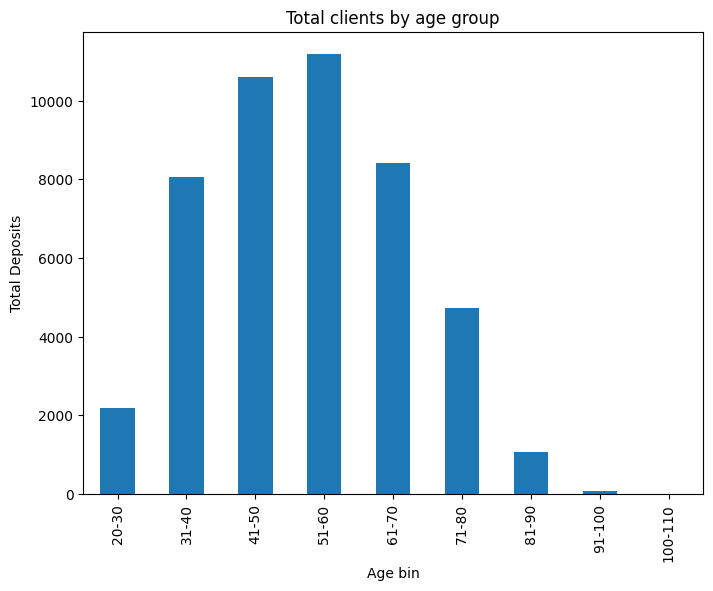

In [862]:
# Total deposit by age group
df.groupby('age_bin')['client_id'].nunique().plot(kind='bar',title= 'Total clients by age group',figsize=(8,6))
plt.xlabel('Age bin')
plt.ylabel('Total Deposits')

**Conclusion 1**: The demographic that most frequently utilizes Freedom Debt's services appears to be those between the ages of 31 and 70.

C:\Users\quynh\AppData\Local\Temp\ipykernel_16932\3803284613.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_bin','client_residence_status'])['client_id'].nunique().unstack().plot(kind='bar',title= 'Total clients by age group',figsize=(8,6))


Text(0, 0.5, 'Total Deposits')

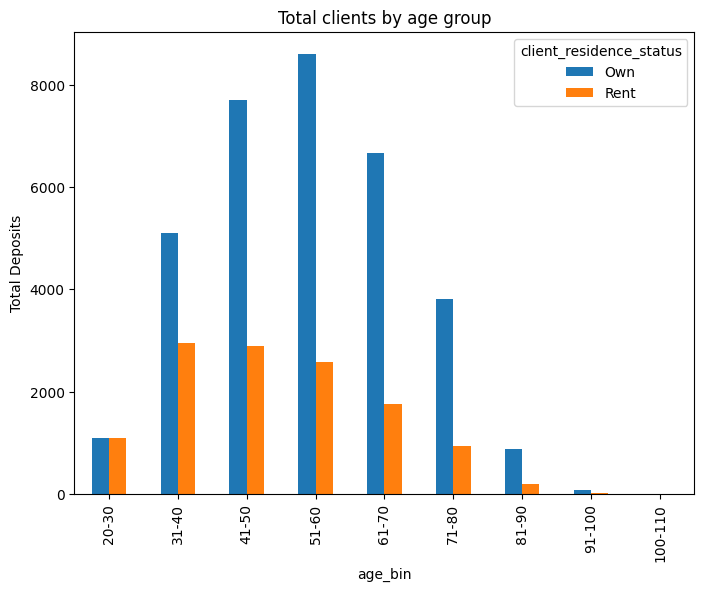

In [863]:
# Total clients by age group by residence status
df.groupby(['age_bin','client_residence_status'])['client_id'].nunique().unstack().plot(kind='bar',title= 'Total clients by age group',figsize=(8,6))
plt.ylabel('Total Deposits')

**Conclusion 2**: We also note that those who were homeowners were ready to utilize the service of Freedom Debt better.

*2.2. Define the group of Clients based on deposits*

In [864]:
# Total of Deposit by age group by deposit candence
df3['age_bin'] = pd.cut(df['client_age'], bins,
                  labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100','100-110'])
df3.groupby(['age_bin','deposit_cadence'])['deposit_amount'].sum().unstack()


C:\Users\quynh\AppData\Local\Temp\ipykernel_16932\1643932145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['age_bin'] = pd.cut(df['client_age'], bins,
C:\Users\quynh\AppData\Local\Temp\ipykernel_16932\1643932145.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(['age_bin','deposit_cadence'])['deposit_amount'].sum().unstack()


deposit_cadence,Biweekly,Extra,Monthly
age_bin,,,
20-30,899396.76,208221.82,1533118.60
31-40,4641633.29,931504.09,7662966.71
41-50,6809891.45,1467794.40,12076686.83
51-60,6890982.47,1491154.36,13695497.06
61-70,3505971.38,1221339.05,11731709.99
71-80,451581.25,470499.86,8206322.20
81-90,62658.00,55037.04,1896131.31
91-100,0.00,17215.94,143268.00
100-110,0.00,0.00,6867.00


C:\Users\quynh\AppData\Local\Temp\ipykernel_16932\1365780036.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby(['age_bin','deposit_cadence'])['deposit_amount'].sum().unstack().plot(kind='bar')


<Axes: xlabel='age_bin'>

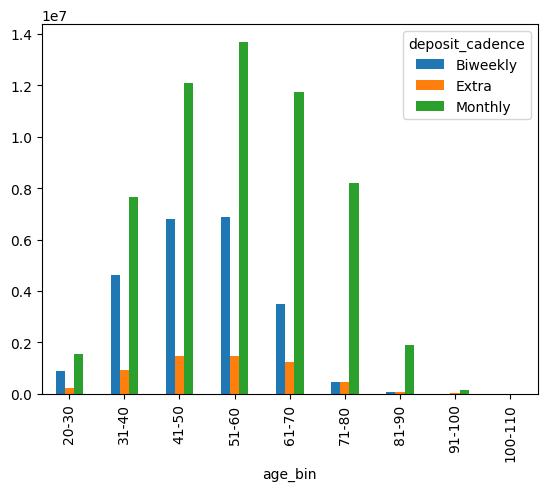

In [865]:
df3.groupby(['age_bin','deposit_cadence'])['deposit_amount'].sum().unstack().plot(kind='bar')

**Conclusion 3**: The clients in 31-70 age range bring revenue for Freedom Debt more than others and mainly by monthly payment.

*2.3. Define the region where the campain attract the most clients*

In [866]:
# The list of new clients in month 3
new_clients_m3

{25258289692679,
 458521506512903,
 786837019590665,
 811686776406026,
 110344990556172,
 517541661245453,
 144209250582543,
 525391120465939,
 901078842507285,
 76917148057621,
 856566523887639,
 102774552920088,
 260461921239067,
 803387545944096,
 916195204956193,
 531357610213419,
 472594021646380,
 512798536695862,
 694829016973369,
 153764487364669,
 815681750171710,
 937211404025921,
 853667780984912,
 60721684447313,
 774022666780754,
 902842691715153,
 13484424200277,
 852997475303511,
 926897772757087,
 142591525355616,
 212881061511271,
 626589481631854,
 523911911080048,
 906937181012081,
 672378540687475,
 584032637943930,
 541402024640635,
 314911377784958,
 499809813921919,
 813133413580927,
 148522649714821,
 990683367899270,
 55003322056846,
 644972423446675,
 976496954605715,
 767526667092117,
 112239849341075,
 6301504602261,
 875005872504985,
 178012604039331,
 446258952306853,
 519898663452837,
 51157370634408,
 412665298026675,
 582337177583799,
 728765970710712,


In [867]:
df4 = df[(df['client_id'].isin(new_clients_m3)) & (df['month_name'] == 'Month 3')]

In [868]:
# Total new clients by region in month 3
new_client_by_region = df4.groupby('client_geographical_region')['client_id'].nunique().reset_index(name='total clients')
new_client_by_region

,client_geographical_region,total clients
0,Midwest,2016
1,Northeast,1915
2,South,2440
3,West,5173


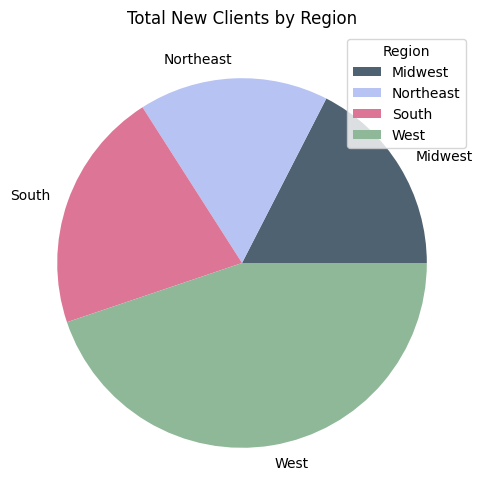

In [869]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.figure(figsize=(6,6))
pie = plt.pie(new_client_by_region['total clients'],labels=new_client_by_region['client_geographical_region'],colors=colors)
plt.title('Total New Clients by Region')
plt.legend(title='Region', loc='upper right')
plt.show()

**Conclusion 4**: The western region sees a higher rate of new customer acquisition from marketing campaigns than other areas.

*2.4. Solution for improving performance of marketing campaign*

**Targeted Customer:**
- Range Age: 31-70
- Residence: homeowner
- Region: West
- Deposit cadence: Monthly

- Solution 1: **Market Research**: Divide your customer group from 30-70 years old into subgroups based on age, income, and debt level. And further research on the financial situation of this age group.
- Solution 2: **Collaborate with partners**: Consider partnering with financial institutions or real estate firms to widen the Freedom Debt service's audience and boost awareness
- Solution 3: **Content marketing**: Present success stories from current tenants who own apartments and are between the ages of 31 and 70.
- Solution 4: **Email marketing**: Send information and exclusive offers designed just for clients in this age range and apartment owners by using email marketing.
- Solution 5: **Promotions**: Give discounts on interest rates and/or low or no transaction fees for services provided by Freedom Debt.
- Solution 6: **Local advertising**: Use local media channels such as television, radio advertising or social media platforms to expand customers in other regional areas except the West region.

**3. How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.**

In [870]:
total_deposit
total_deposit['Growth_Rate'] = total_deposit['Total deposit amount'].pct_change()
total_deposit

,month_name,Total deposit amount,Growth_Rate
0,Month 1,14290184.25,NaN
1,Month 2,14653623.58,0.025433
2,Month 3,19524393.05,0.332394
3,Month 4,18951569.18,-0.029339
4,Month 5,18657678.80,-0.015507


In [871]:
# Growth rate before campaign
growth_rate_before = total_deposit['Growth_Rate'][1]
growth_rate_before

0.025432795241950856

In [872]:
# Growth rate the month that runs campaign
growth_rate_campaign = total_deposit['Growth_Rate'][2]
growth_rate_campaign

0.33239351641650394

In [873]:
# The change of growth rate in Month 5 compared to Month 4
change_of_growth_rate_after = total_deposit['Growth_Rate'][4]/total_deposit['Growth_Rate'][3]
change_of_growth_rate_after

0.5285628434945407

In [874]:
# The growth rate of the first month after the month of campaign
growth_rate_1st_month_after = total_deposit['Growth_Rate'][3]
growth_rate_1st_month_after


-0.029338882316754078

In [875]:
# Create a list to contains values of growth in the next months
rate = [growth_rate_1st_month_after]

for i in range (1,9):
    next_rate = change_of_growth_rate_after*rate[-1]
    rate.append(next_rate)
    

In [876]:
rate

[-0.029338882316754078,
 -0.015507443062295234,
 -0.008196658200336458,
 -0.0043324489655226835,
 -0.002289971544511651,
 -0.0012103938710886636,
 -0.0006397692262509886,
 -0.00033815824140752475,
 -0.00017873788162947463]

In [877]:
# Create a dataframe to track revenue across 12 months with 3 scenarios: no campaign, campaign run in Month 3 and campaign run in Month 6
df5 = pd.DataFrame(np.zeros((12, 3)), columns=['no_campaign', 'campaign_in_month_3', 'campaign_in_month_6'])
df5.index = df5.index + 1
df5.index.name = 'month'
df5

,no_campaign,campaign_in_month_3,campaign_in_month_6
month,,,
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [878]:
# Set the cost for marketing if campaign run in Month 3
df5.loc[3,'campaign_in_month_3'] = -5000000

# Set the cost for marketing if campaign run in Month 3
df5.loc[6,'campaign_in_month_6'] = -5000000

In [879]:
# Set revenue of the first month
df5.loc[1,:] = 14290184.25

In [880]:
df5

,no_campaign,campaign_in_month_3,campaign_in_month_6
month,,,
1,14290184.25,14290184.25,14290184.25
2,0.00,0.00,0.00
3,0.00,-5000000.00,0.00
4,0.00,0.00,0.00
5,0.00,0.00,0.00
6,0.00,0.00,-5000000.00
7,0.00,0.00,0.00
8,0.00,0.00,0.00
9,0.00,0.00,0.00


In [881]:
# Increased revenue if no campaign
for i in range(2,13):
    df5.loc[i,'no_campaign'] = df5.loc[i-1,'no_campaign']*(1+growth_rate_before)

# Increased revenue if campaign runs in month 3
for i in range(2,13):
    if i < 3:
        df5.loc[i,'campaign_in_month_3'] = df5.loc[i-1,'campaign_in_month_3']*(1+growth_rate_before)
    elif i == 3:
        df5.loc[i,'campaign_in_month_3'] = df5.loc[i-1,'campaign_in_month_3']*(1+growth_rate_campaign)
    elif i == 4: 
        df5.loc[i,'campaign_in_month_3'] = df5.loc[i-1,'campaign_in_month_3']*(1+growth_rate_1st_month_after)
    else:
        for j in range(len(rate)):
            df5.loc[i,'campaign_in_month_3'] = df5.loc[i-1,'campaign_in_month_3']*(1+rate[j+1])
            break
# Increased revenue if campaign runs in month 6
for i in range(2,13):
    for j in rate:
        if i < 6:
            df5.loc[i,'campaign_in_month_6'] = df5.loc[i-1,'campaign_in_month_6']*(1+growth_rate_before)
        elif i == 6:
            df5.loc[i,'campaign_in_month_6'] = df5.loc[i-1,'campaign_in_month_6']*(1+growth_rate_campaign)
        elif i == 7: 
            df5.loc[i,'campaign_in_month_6'] = df5.loc[i-1,'campaign_in_month_6']*(1+growth_rate_1st_month_after)
        else:
            for j in range(len(rate)):
                df5.loc[i,'campaign_in_month_6'] = df5.loc[i-1,'campaign_in_month_6']*(1+rate[j+1])
                break



In [882]:
df5

,no_campaign,campaign_in_month_3,campaign_in_month_6
month,,,
1,1.429018e+07,1.429018e+07,1.429018e+07
2,1.465362e+07,1.465362e+07,1.465362e+07
3,1.502631e+07,1.952439e+07,1.502631e+07
4,1.540847e+07,1.895157e+07,1.540847e+07
5,1.580035e+07,1.865768e+07,1.580035e+07
6,1.620219e+07,1.836835e+07,2.105228e+07
7,1.661426e+07,1.808350e+07,2.043463e+07
8,1.703681e+07,1.780307e+07,2.011774e+07
9,1.747010e+07,1.752699e+07,1.980577e+07


<Axes: title={'center': 'Comparison of Campaign Strategies Over Months'}, xlabel='Month', ylabel='Revenue($)'>

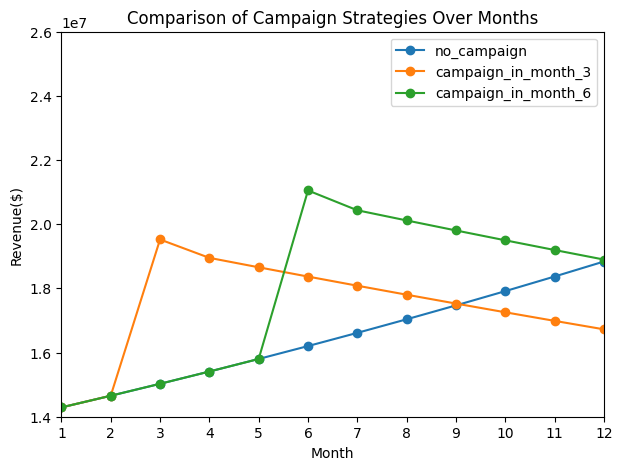

In [883]:
df5.plot(
    kind='line', 
    marker='o',
    figsize=(7, 5), 
    title='Comparison of Campaign Strategies Over Months',
    ylabel='Revenue($)',
    xlabel='Month',
    ylim=(14000000, 26000000),
    xlim=(1, 12),
    xticks=np.arange(1, 13, 1))

In [884]:
# The average of revenue if no campaign
df5['no_campaign'].mean()

16468664.38049548

In [885]:
# The average of revenue if campaign in month 3
df5['campaign_in_month_3'].mean()

17402194.205630843

In [886]:
# The average of revenue if campaign in month 6
df5['campaign_in_month_6'].mean()

17848567.045809444


**Conclusion**: Obviously, running a marketing campaign in Month 6 will be as effective as running a campaign in Month 3.